# Classification - Supervised ML
1. Introduction to classification
2. Types of classification
3. Workflow of a classification model
4. Choosing data
5. EDA
6. Data Preprocessing
7. Implementation of Classification Models
   - Logistic Regression
   - k_Nearest neighbors - KNN
   - Decision Trees
   - Random Forest
   - Support Vector Machines
   - Naive Bayes
   - Gradient Boosting (XGBoost, LightGBM)
8. Model Evaluation Metrics
9. Hyperparameter Tuning

# Introduction
- Classification is a supervised ML where thegoal is to assign labels to the input data.
- Used widely to spam detection, Medical Diagnose, Fraud Detection, 

# Types of Classification Algorithms
## 1. Linear Models
- Logistic Regression
- Linear Dicriminant Analysis
## 2. Distance Based Models
- k-NearestNeighbors (KNN)
## 3. Tree Based Models
- Decsion Trees
- Random Forest
- Gradient Boosting (XGBoost, LightGBM)
## 4. Kernel-Based Model
- Support Vector Machine (SVM)

## 5. Probabilistic Models
- Naive Bayes

# Workflow
1. Load the dataset
2. Exploratory data Analysis
3. Preprocess and Feature Engineering
4. Split the data into train-test-split
5. Train the model
6. Evaluate model performance
7. Optimize and tune the hyperparameters
8. Deploy model

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['target'] = iris.target # Adding target column

# Head of the data
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


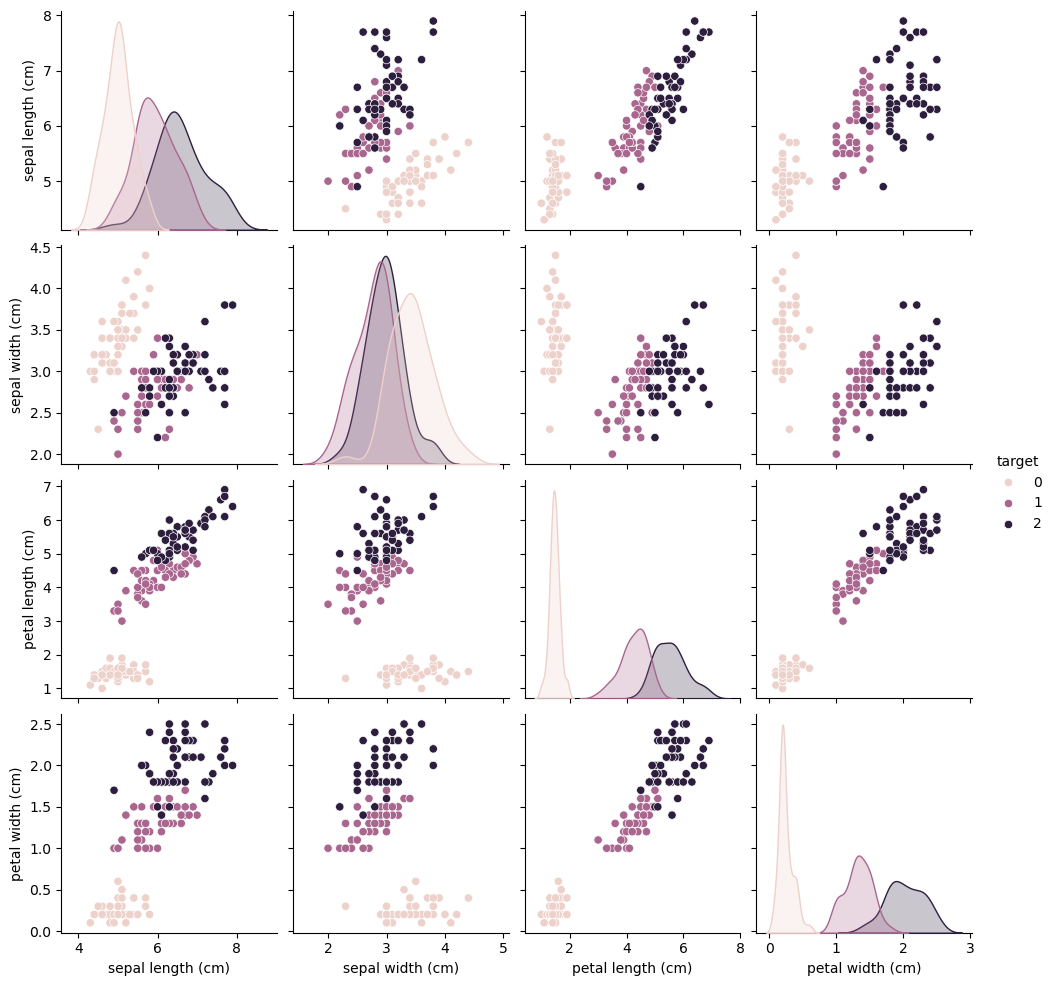

In [2]:
# seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Pair plot
sns.pairplot(df, hue = 'target')
plt.show()

In [3]:
# Algorithms


In [4]:
# Import the linraries and load the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [5]:
titanic = sns.load_dataset('titanic') # Binary classification 
iris = sns.load_dataset('iris') # Multiclass classification

# Data Exploration

In [6]:
titanic.info() # Information of my data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [7]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
# iris
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


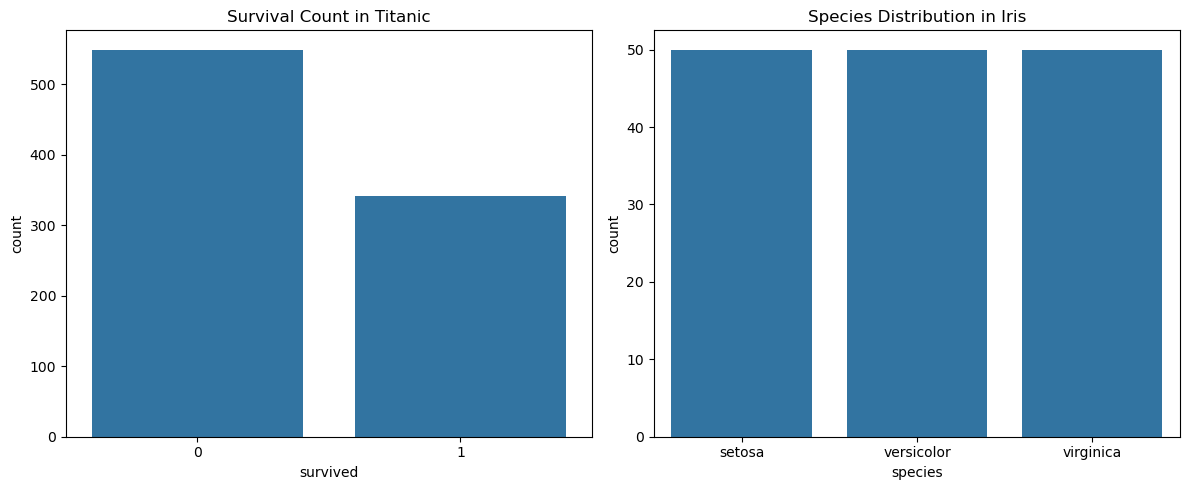

In [10]:
# Visualize the data

plt.figure(figsize = (12, 5))

# Plot the titanic survial count
plt.subplot(1,2,1)
sns.countplot(x = 'survived', data = titanic)
plt.title("Survival Count in Titanic")

# Iris Species Distribution
plt.subplot(1,2,2)
sns.countplot(x = 'species', data = iris)
plt.title("Species Distribution in Iris")

plt.tight_layout()
plt.show()

# Data Preprocessing for the titanic Dataset

In [11]:
titanic.shape

(891, 15)

In [12]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [13]:
# Handling the missing data
titanic_clean = titanic.copy()
titanic_clean['age'].fillna(titanic_clean["age"].median(), inplace = True)
titanic_clean['embarked'].fillna(titanic_clean['embarked'].mode()[0], inplace = True)

# Driop unneccesary Columns
titanic_clean = titanic_clean.drop(['deck', 'embark_town', 'who', 'alive', 'class', 'adult_male', 'alone'], axis = 1)


C:\Users\Admin\AppData\Local\Temp\ipykernel_4192\2424666053.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_clean['age'].fillna(titanic_clean["age"].median(), inplace = True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_4192\2424666053.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

In [14]:
titanic_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       891 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [15]:
# Use one hot encoder to convert the categorical columns to nuerical columns
titanic_processed = pd.get_dummies(titanic_clean, columns = ['sex', 'embarked'], drop_first = True)


In [16]:
# Defines features and target varaible
X_titanic = titanic_processed.drop(['survived'], axis = 1)
y_titanic = titanic_processed['survived']

In [17]:
# Split the data into training and testing sets
X_train_titanic, X_test_titanic, y_train_titanic, y_test_titanic = train_test_split(X_titanic, y_titanic, test_size = 0.2, random_state = 42)

In [18]:
# Scale the features
scaler_titanic = StandardScaler()
X_train_titanic_scaled = scaler_titanic.fit_transform(X_train_titanic)
X_test_titanic_scaled = scaler_titanic.transform(X_test_titanic)

# Logistic Regression - Titanic Dataset

In [19]:
from sklearn.linear_model import LogisticRegression

# creat and train the model
log_reg = LogisticRegression(random_state = 42) # Innitializing the model
log_reg.fit(X_train_titanic_scaled, y_train_titanic)

LogisticRegression(random_state=42)

In [20]:
# make a prediction 
y_pred_titanic_log = log_reg.predict(X_test_titanic_scaled)

In [21]:
y_pred_titanic_log

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [22]:
y_test_titanic

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: survived, Length: 179, dtype: int64

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

In [24]:
# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test_titanic, y_pred_titanic_log):.4f}")
print(f"Precision: {precision_score(y_test_titanic, y_pred_titanic_log):.4f}")
print(f"Recall: {recall_score(y_test_titanic, y_pred_titanic_log):.4f}")
print(f"F-1 Score: {f1_score(y_test_titanic, y_pred_titanic_log):.4f}")

Accuracy: 0.8101
Precision: 0.7857
Recall: 0.7432
F-1 Score: 0.7639


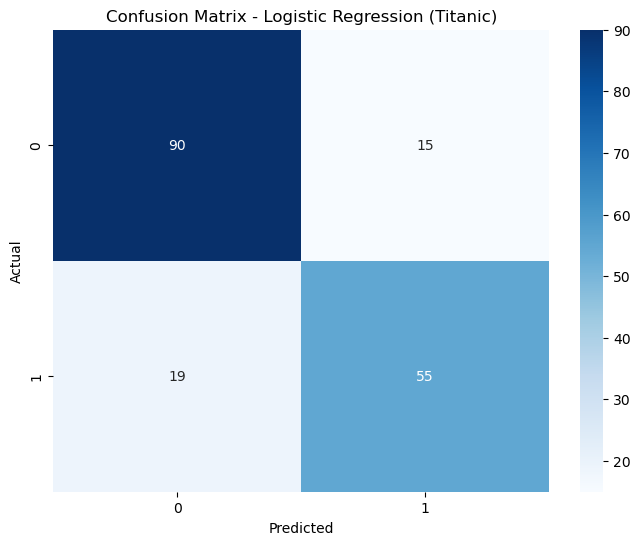

In [25]:
# Display the confusion matrix
plt.figure(figsize = (8, 6))
cm = confusion_matrix(y_test_titanic, y_pred_titanic_log)
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.title("Confusion Matrix - Logistic Regression (Titanic)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [26]:
# Feature Importance
coefficients = pd.DataFrame(
    log_reg.coef_[0],
    index = X_train_titanic.columns,
    columns = ['Coefficient']
)
print("Feature Importance:")
print(coefficients.sort_values(by="Coefficient", ascending=False))

Feature Importance:
            Coefficient
fare           0.126511
embarked_Q    -0.046058
parch         -0.096142
embarked_S    -0.189423
sibsp         -0.349952
age           -0.396152
pclass        -0.785328
sex_male      -1.277104


# K-Nearest Neighbors KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
# Create and train model
knn = KNeighborsClassifier(n_neighbors = 5) # Creates the model
knn.fit(X_train_titanic_scaled, y_train_titanic)

KNeighborsClassifier()

In [29]:
# Make predictions
y_pred_titanic_knn = knn.predict(X_test_titanic_scaled)

In [30]:
# Evaluate the performance of the model
print(f"Accuracy: {accuracy_score(y_test_titanic, y_pred_titanic_knn):.4f}")
print(f"Precision: {precision_score(y_test_titanic, y_pred_titanic_knn):.4f}")
print(f"Recall: {recall_score(y_test_titanic, y_pred_titanic_knn):.4f}")
print(f"F-1 Score: {f1_score(y_test_titanic, y_pred_titanic_knn):.4f}")

Accuracy: 0.8045
Precision: 0.7826
Recall: 0.7297
F-1 Score: 0.7552


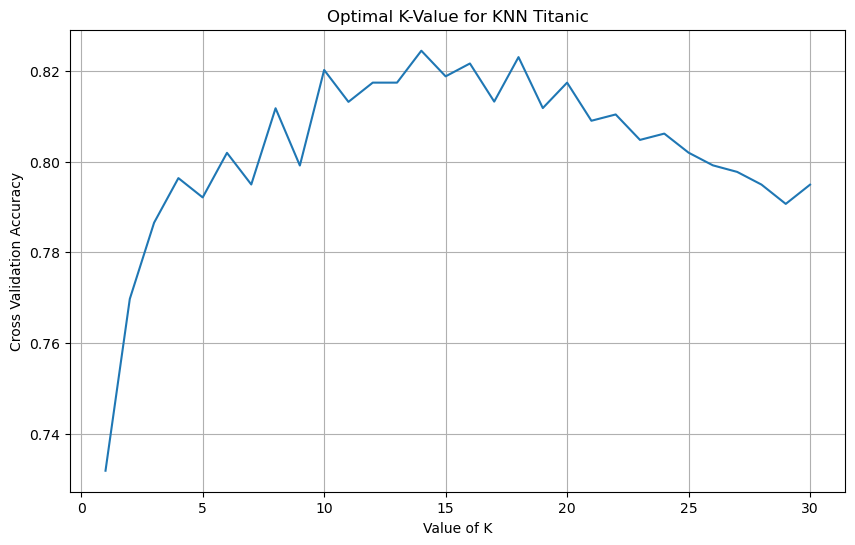

In [31]:
# Find the optimal value of k
from sklearn.model_selection import cross_val_score
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X_train_titanic_scaled, y_train_titanic, cv = 10, scoring = 'accuracy')
    k_scores.append(scores.mean())

# Plot for the k values
plt.figure(figsize = (10, 6))
plt.plot(k_range, k_scores)
plt.xlabel("Value of K")
plt.ylabel("Cross Validation Accuracy")
plt.title("Optimal K-Value for KNN Titanic")
plt.grid(True)
plt.show()

In [32]:
# TEst
# Create and train model
knn_2 = KNeighborsClassifier(n_neighbors = 13) # Creates the model
knn_2.fit(X_train_titanic_scaled, y_train_titanic)

KNeighborsClassifier(n_neighbors=13)

In [33]:
# Make predictions
y_pred_titanic_knn = knn_2.predict(X_test_titanic_scaled)

In [34]:
# Evaluate the performance of the model
print(f"Accuracy: {accuracy_score(y_test_titanic, y_pred_titanic_knn):.4f}")
print(f"Precision: {precision_score(y_test_titanic, y_pred_titanic_knn):.4f}")
print(f"Recall: {recall_score(y_test_titanic, y_pred_titanic_knn):.4f}")
print(f"F-1 Score: {f1_score(y_test_titanic, y_pred_titanic_knn):.4f}")

Accuracy: 0.8045
Precision: 0.8095
Recall: 0.6892
F-1 Score: 0.7445


# Decision Trees


In [35]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [36]:
# Create and train the model
dt = DecisionTreeClassifier(random_state = 42, max_depth = 4)
dt.fit(X_train_titanic_scaled, y_train_titanic)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [37]:
# Make predictions
y_pred_titanic_dt = dt.predict(X_test_titanic_scaled)

In [38]:
y_pred_titanic_dt

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0], dtype=int64)

In [39]:
# Evaluate the performance of the model
print(f"Accuracy: {accuracy_score(y_test_titanic, y_pred_titanic_dt):.4f}")
print(f"Precision: {precision_score(y_test_titanic, y_pred_titanic_dt):.4f}")
print(f"Recall: {recall_score(y_test_titanic, y_pred_titanic_dt):.4f}")
print(f"F-1 Score: {f1_score(y_test_titanic, y_pred_titanic_dt):.4f}")

Accuracy: 0.7989
Precision: 0.8393
Recall: 0.6351
F-1 Score: 0.7231


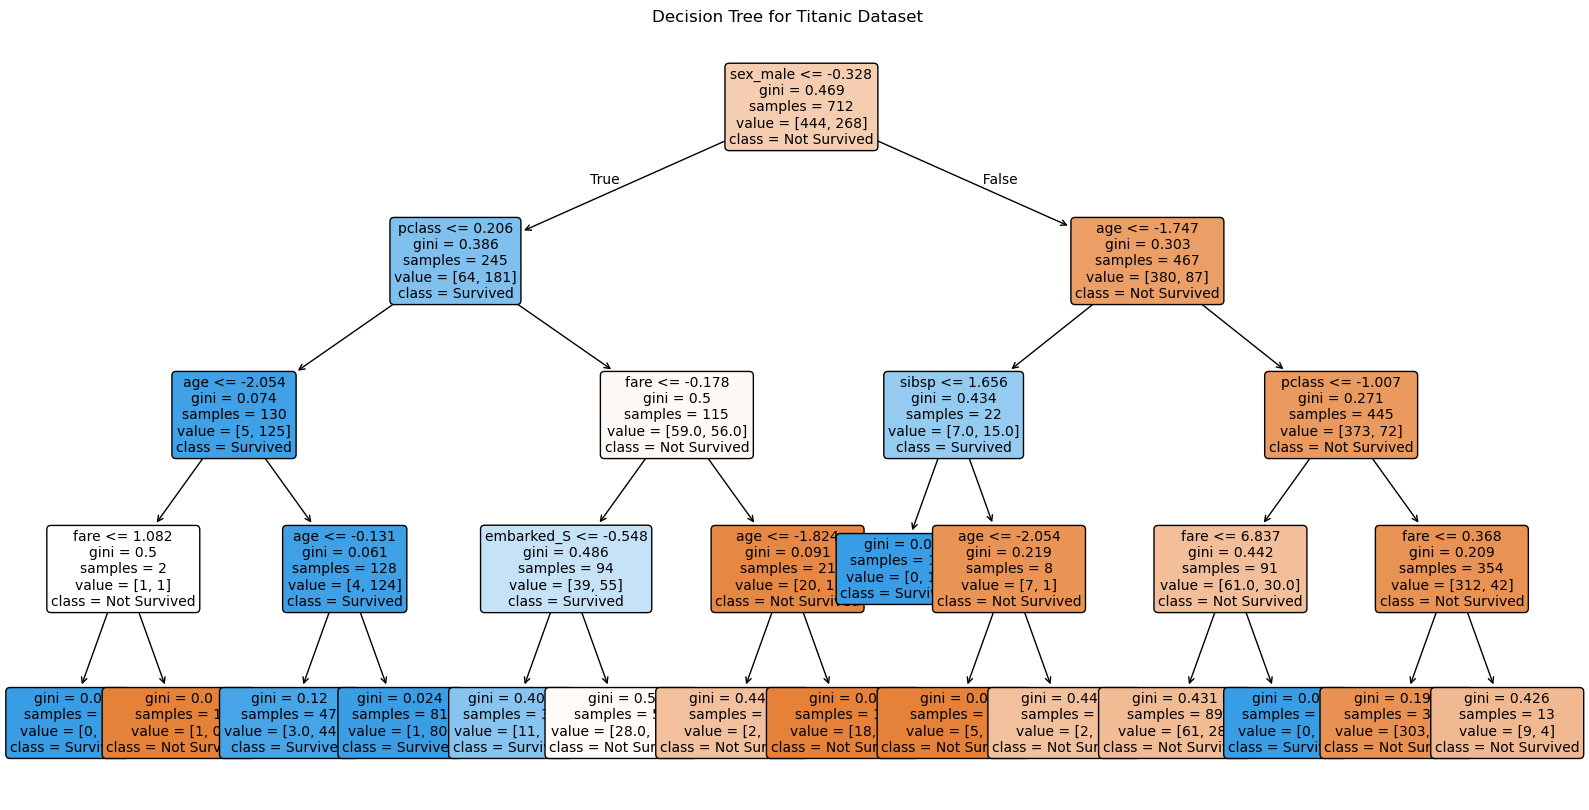

In [40]:
# Visualize the decsion Tree
plt.figure(figsize = (20, 10))
plot_tree(dt, feature_names = X_train_titanic.columns, class_names = ['Not Survived', 'Survived'],
          filled = True, rounded = True, fontsize = 10)
plt.title("Decision Tree for Titanic Dataset")
plt.show()

In [41]:
# Show the feature importance
feature_importance = pd.DataFrame(
    dt.feature_importances_,
    index=X_train_titanic.columns,
    columns = ['Importance']
)
print("Feature Importance: ")
print(feature_importance.sort_values(by="Importance", ascending = False))

Feature Importance: 
            Importance
sex_male      0.579608
pclass        0.200498
fare          0.081064
age           0.078872
sibsp         0.046059
embarked_S    0.013900
parch         0.000000
embarked_Q    0.000000


# Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
# Create and train the model
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train_titanic_scaled, y_train_titanic)

RandomForestClassifier(random_state=42)

In [44]:
# Make predictions
y_pred_titanic_rf = rf.predict(X_test_titanic_scaled)

In [45]:
# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test_titanic, y_pred_titanic_rf):.4f}")
print(f"Precision: {precision_score(y_test_titanic, y_pred_titanic_rf):.4f}")
print(f"Recall: {recall_score(y_test_titanic, y_pred_titanic_rf):.4f}")
print(f"F-1 Score: {f1_score(y_test_titanic, y_pred_titanic_rf):.4f}")

Accuracy: 0.8212
Precision: 0.8000
Recall: 0.7568
F-1 Score: 0.7778


In [49]:
# Show the feature importance
feature_importance_rf = pd.DataFrame(
    rf.feature_importances_,
    index = X_train_titanic.columns,
    columns = ['importance']
)
print("Feature Importance: ")
print(feature_importance_rf.sort_values(by = "importance", ascending = False))

Feature Importance: 
            importance
sex_male      0.273316
fare          0.272058
age           0.252745
pclass        0.078616
sibsp         0.052192
parch         0.038490
embarked_S    0.023095
embarked_Q    0.009488


In [53]:
X_train_titanic.columns

Index(['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_male', 'embarked_Q',
       'embarked_S'],
      dtype='object')

In [51]:
feature_importance_rf

,importance
pclass,0.078616
age,0.252745
sibsp,0.052192
parch,0.038490
fare,0.272058
sex_male,0.273316
embarked_Q,0.009488
embarked_S,0.023095


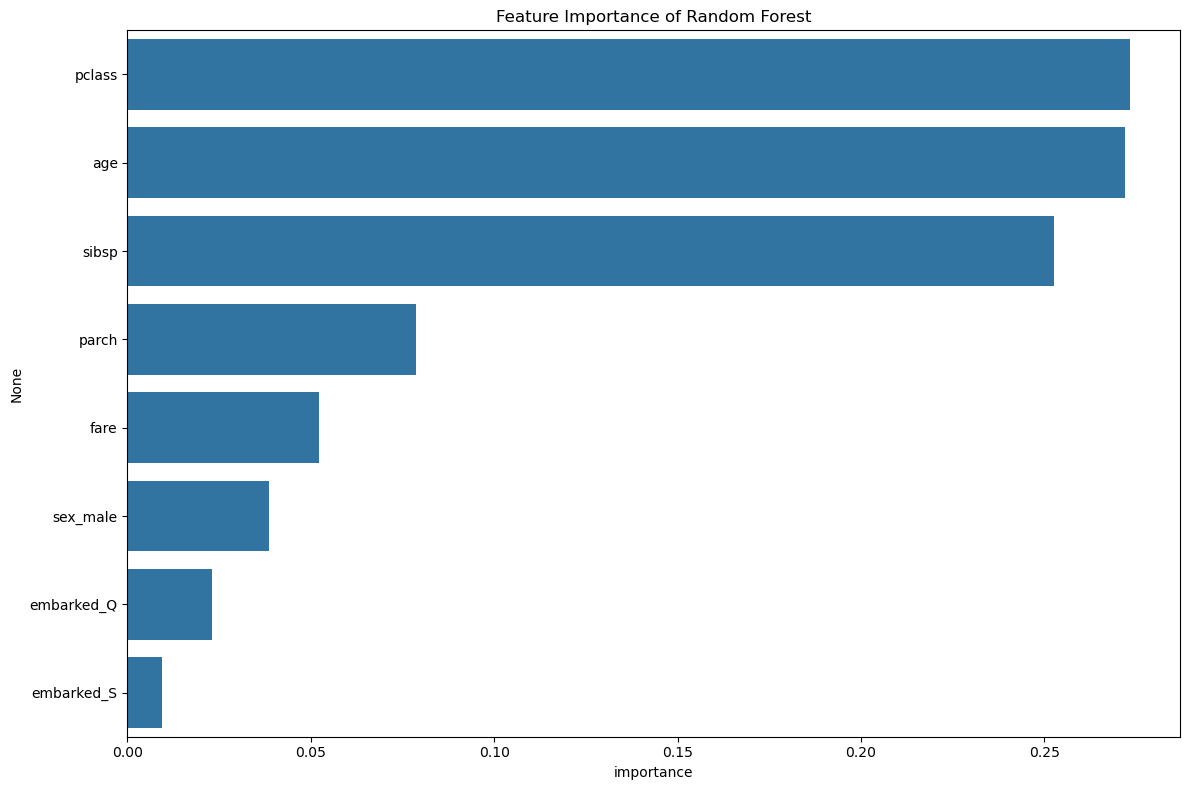

In [50]:
# Visualize the feature importance
plt.figure(figsize = (12, 8))
sns.barplot(x = 'importance', y = feature_importance_rf.index, data = feature_importance_rf.sort_values(by='importance', ascending = False))
plt.title("Feature Importance of Random Forest")
plt.tight_layout()
plt.show()

In [68]:
# Find the optimal Tree
# n_estimators_range = [10, 30, 50, 70, 100, 200]
n_estimators_range = [45, 50, 55, 60, 65, 70]
accuracy_score_rf = []

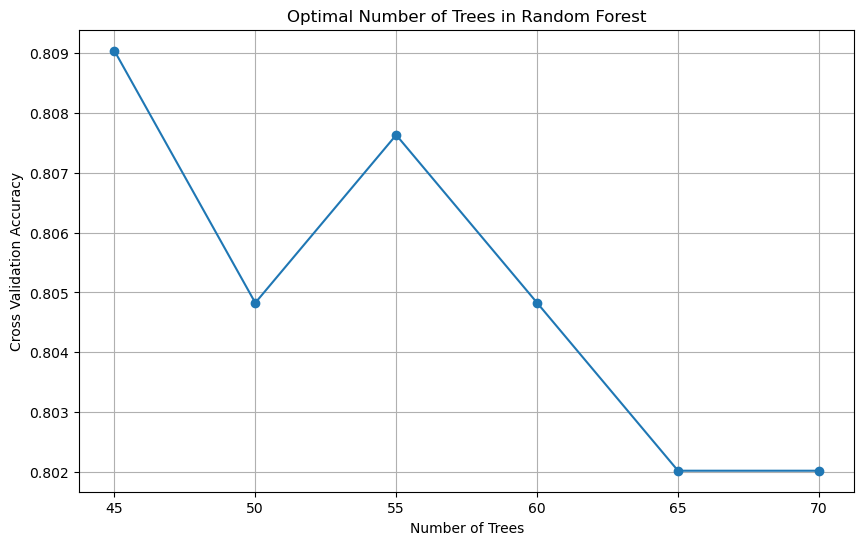

In [69]:
for n_estimator in n_estimators_range:
    rf = RandomForestClassifier(n_estimators = n_estimator, random_state = 42)
    scores = cross_val_score(rf, X_train_titanic_scaled, y_train_titanic, cv = 5, scoring = 'accuracy')
    accuracy_score_rf.append(scores.mean())

plt.figure(figsize = (10, 6))
plt.plot(n_estimators_range, accuracy_score_rf, marker = 'o')
plt.xlabel("Number of Trees")
plt.ylabel("Cross Validation Accuracy")
plt.title("Optimal Number of Trees in Random Forest")
plt.grid(True)
plt.show()

# Support Vector Machines (SVM)

In [70]:
from sklearn.svm import SVC

# Create and train the model
svm = SVC(kernel = 'rbf', random_state = 42, probability = True)
svm.fit(X_train_titanic_scaled, y_train_titanic)

SVC(probability=True, random_state=42)

In [71]:
# make prediction
y_pred_titanic_svm = svm.predict(X_test_titanic_scaled)

In [72]:
# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test_titanic, y_pred_titanic_svm):.4f}")
print(f"Precision: {precision_score(y_test_titanic, y_pred_titanic_svm):.4f}")
print(f"Recall: {recall_score(y_test_titanic, y_pred_titanic_svm):.4f}")
print(f"F-1 Score: {f1_score(y_test_titanic, y_pred_titanic_svm):.4f}")

Accuracy: 0.8212
Precision: 0.8387
Recall: 0.7027
F-1 Score: 0.7647


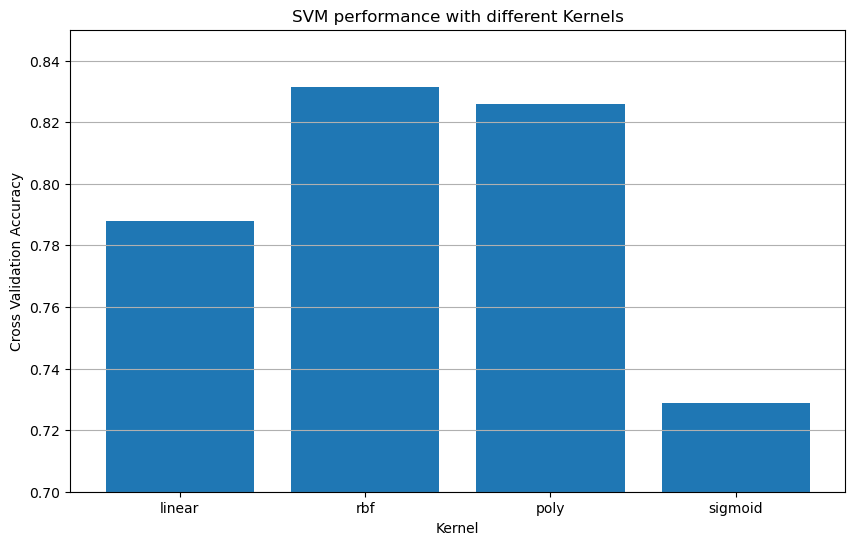

In [73]:
# Test this with different Kernels
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
accuracy_scores_svm = []

for kernel in kernels:
    svm = SVC(kernel = kernel, random_state = 42)
    scores = cross_val_score(svm, X_train_titanic_scaled, y_train_titanic, cv = 5, scoring = 'accuracy')
    accuracy_scores_svm.append(scores.mean())

# Plot
plt.figure(figsize = (10, 6))
plt.bar(kernels, accuracy_scores_svm)
plt.xlabel("Kernel")
plt.ylabel("Cross Validation Accuracy")
plt.title("SVM performance with different Kernels")
plt.ylim(0.7, 0.85)
plt.grid(True, axis='y')
plt.show()

# Unsupervised Machine Learning
- It is a type of machine learning where Algorithms find the patterns in the data without explicit guidance or label outputs.

## Key Goals 
- Discover the Hidden patterns and structures in the data
- Reduce dimensionality while preserving the important information
- Group Similar data points together
- Identify Anomalies
- Learn the underlying distribution of the data